In [1]:
!nvidia-smi

Tue Feb 24 19:20:04 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q transformers sentence-transformers bert-score sacrebleu rouge-score datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 11.1 MB/s eta 0:00:00


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


In [5]:
model_name = "microsoft/DialoGPT-small"

tokenizer_dialo = AutoTokenizer.from_pretrained(model_name)
model_dialo = AutoModelForCausalLM.from_pretrained(model_name).to(device)

print("DialoGPT loaded")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/149 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie transformer.wte.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
GPT2LMHeadModel LOAD REPORT from: microsoft/DialoGPT-small
Key                              | Status     |  | 
---------------------------------+------------+--+-
transformer.h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

DialoGPT loaded


In [6]:
def chat_dialo(prompt):
    inputs = tokenizer_dialo.encode(prompt + tokenizer_dialo.eos_token, return_tensors="pt").to(device)
    outputs = model_dialo.generate(inputs, max_new_tokens=50, pad_token_id=tokenizer_dialo.eos_token_id)
    response = tokenizer_dialo.decode(outputs[:, inputs.shape[-1]:][0], skip_special_tokens=True)
    return response

chat_dialo("Hello, how are you?")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


"I'm here"

In [7]:
model_name = "facebook/blenderbot-400M-distill"

tokenizer_blender = AutoTokenizer.from_pretrained(model_name)
model_blender = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

print("BlenderBot loaded")

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/355 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/730M [00:00<?, ?B/s]

The tied weights mapping and config for this model specifies to tie model.shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

BlenderBot loaded


In [8]:
def chat_blender(prompt):
    inputs = tokenizer_blender(prompt, return_tensors="pt").to(device)
    reply_ids = model_blender.generate(**inputs, max_new_tokens=50)
    return tokenizer_blender.decode(reply_ids[0], skip_special_tokens=True)

chat_blender("Tell me a joke")

' What do you call a deer with no teeth?  A deer.  A pig.'

In [9]:
model_name = "gpt2"

tokenizer_gpt2 = AutoTokenizer.from_pretrained(model_name)
model_gpt2 = AutoModelForCausalLM.from_pretrained(model_name).to(device)

print("GPT2 loaded")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2 loaded


In [10]:
def chat_gpt2(prompt):
    inputs = tokenizer_gpt2.encode(prompt, return_tensors="pt").to(device)
    outputs = model_gpt2.generate(inputs, max_new_tokens=50, pad_token_id=tokenizer_gpt2.eos_token_id)
    return tokenizer_gpt2.decode(outputs[0], skip_special_tokens=True)

chat_gpt2("What is artificial intelligence?")

'What is artificial intelligence?\n\nAI is a new field of research that has been around for a long time. It is a new field of research that has been around for a long time. It is a new field of research that has been around for a long time.'

In [11]:
# Install required libraries
!pip install -q transformers datasets sentence-transformers bert-score sacrebleu rouge-score pandas matplotlib

In [12]:
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
from bert_score import score as bert_score
import sacrebleu
from rouge_score import rouge_scorer
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


In [14]:
from datasets import load_dataset

# Correct way to load DailyDialog (parquet version)
dataset = load_dataset("daily_dialog", trust_remote_code=True)

print(dataset)

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'daily_dialog' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'daily_dialog' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


RuntimeError: Dataset scripts are no longer supported, but found daily_dialog.py

In [13]:
# Load DailyDialog
dataset = load_dataset("daily_dialog")

# Use only small subset (for speed)
test_data = dataset["test"].select(range(200))

# Prepare context-response pairs
data = []
for item in test_data:
    dialog = item["dialog"]
    for i in range(len(dialog)-1):
        context = dialog[i]
        response = dialog[i+1]
        data.append({"context": context, "response": response})

print("Total pairs:", len(data))

README.md: 0.00B [00:00, ?B/s]

daily_dialog.py: 0.00B [00:00, ?B/s]

RuntimeError: Dataset scripts are no longer supported, but found daily_dialog.py

Using device: cuda

Running: DialoGPT-small


Loading weights:   0%|          | 0/149 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie transformer.wte.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
GPT2LMHeadModel LOAD REPORT from: microsoft/DialoGPT-small
Key                              | Status     |  | 
---------------------------------+------------+--+-
transformer.h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Length=1.83, D1=0.273, D2=0.200, Time=0.14s, Size=622MB

Running: BlenderBot-small


config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/350M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/347 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]

The tied weights mapping and config for this model specifies to tie model.shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/311 [00:00<?, ?B/s]

Length=19.50, D1=0.487, D2=0.829, Time=3.23s, Size=656MB

Running: GPT-2


Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Length=30.33, D1=0.291, D2=0.438, Time=3.19s, Size=475MB

Raw Metrics:
                  Avg Response Length  Distinct-1  Distinct-2  \
DialoGPT-small               1.833333    0.272727    0.200000   
BlenderBot-small            19.500000    0.487179    0.828829   
GPT-2                       30.333333    0.291209    0.437500   

                  Inference Time (s)  Model Size (MB)  
DialoGPT-small              0.139297       621.937500  
BlenderBot-small            3.226982       655.757812  
GPT-2                       3.193416       474.700195  


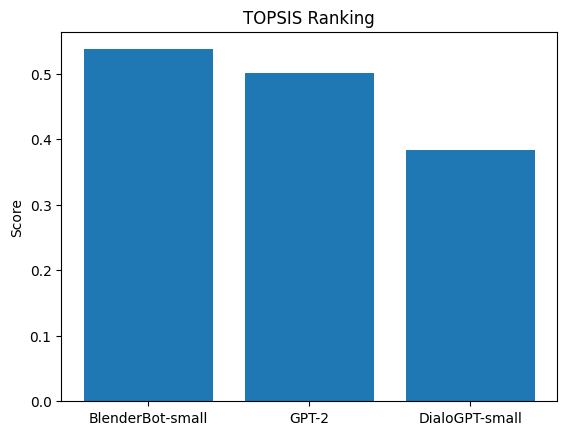


Final Ranking:
                  Avg Response Length  Distinct-1  Distinct-2  \
BlenderBot-small            19.500000    0.487179    0.828829   
GPT-2                       30.333333    0.291209    0.437500   
DialoGPT-small               1.833333    0.272727    0.200000   

                  Inference Time (s)  Model Size (MB)  TOPSIS Score  Rank  
BlenderBot-small            3.226982       655.757812      0.537144     1  
GPT-2                       3.193416       474.700195      0.500190     2  
DialoGPT-small              0.139297       621.937500      0.384162     3  

Files generated:
1. topsis_results.csv
2. topsis_plot.png
3. sample_responses.csv


In [15]:
# ============================
# FAST TOPSIS CHATBOT EVALUATION
# Sameer | Roll: 102316089
# Single Cell Version for Colab
# ============================

# ---------- Install ----------
!pip -q install transformers torch pandas matplotlib

# ---------- Imports ----------
import torch, time, numpy as np, pandas as pd, matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM

# ---------- Device ----------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", DEVICE)

# ---------- Prompts (reduced for speed) ----------
PROMPTS = [
    "Hello! How are you?",
    "Tell me a joke.",
    "What is artificial intelligence?",
    "How do I learn Python?",
    "What is the meaning of life?",
    "Goodbye!"
]

# ---------- Models (lightweight set) ----------
MODELS = {
    "DialoGPT-small": ("microsoft/DialoGPT-small", "causal"),
    "BlenderBot-small": ("facebook/blenderbot_small-90M", "seq2seq"),
    "GPT-2": ("gpt2", "causal")
}

# ---------- Metric Functions ----------
def avg_length(responses):
    return np.mean([len(r.split()) for r in responses])

def diversity(responses):
    tokens = []
    bigrams = []
    for r in responses:
        t = r.lower().split()
        tokens += t
        bigrams += list(zip(t, t[1:]))
    d1 = len(set(tokens)) / len(tokens) if tokens else 0
    d2 = len(set(bigrams)) / len(bigrams) if bigrams else 0
    return d1, d2

# ---------- Generation ----------
def run_model(name, path, model_type):
    print("\nRunning:", name)

    tokenizer = AutoTokenizer.from_pretrained(path)
    if model_type == "causal":
        model = AutoModelForCausalLM.from_pretrained(path).to(DEVICE)
    else:
        model = AutoModelForSeq2SeqLM.from_pretrained(path).to(DEVICE)

    model.eval()

    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    responses = []
    start = time.time()

    for prompt in PROMPTS:
        if model_type == "causal":
            inputs = tokenizer.encode(prompt, return_tensors="pt").to(DEVICE)
            with torch.no_grad():
                output = model.generate(
                    inputs,
                    max_new_tokens=40,
                    do_sample=False,
                    pad_token_id=tokenizer.eos_token_id
                )
            text = tokenizer.decode(output[0][inputs.shape[-1]:], skip_special_tokens=True)
        else:
            inputs = tokenizer(prompt, return_tensors="pt").to(DEVICE)
            with torch.no_grad():
                output = model.generate(inputs["input_ids"], max_new_tokens=40)
            text = tokenizer.decode(output[0], skip_special_tokens=True)

        responses.append(text.strip() if text.strip() else "(no response)")

    latency = (time.time() - start)
    size_mb = sum(p.numel() for p in model.parameters()) * 4 / (1024**2)

    avg_len = avg_length(responses)
    d1, d2 = diversity(responses)

    print(f"Length={avg_len:.2f}, D1={d1:.3f}, D2={d2:.3f}, Time={latency:.2f}s, Size={size_mb:.0f}MB")

    return [avg_len, d1, d2, latency, size_mb], responses

# ---------- Evaluation ----------
results = {}
all_responses = {}

for name, (path, mtype) in MODELS.items():
    metrics, responses = run_model(name, path, mtype)
    results[name] = metrics
    all_responses[name] = responses

# ---------- Build DataFrame ----------
columns = [
    "Avg Response Length",
    "Distinct-1",
    "Distinct-2",
    "Inference Time (s)",
    "Model Size (MB)"
]

df = pd.DataFrame(results, index=columns).T
print("\nRaw Metrics:")
print(df)

# ---------- TOPSIS ----------
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
impacts = [True, True, True, False, False]

matrix = df.values.astype(float)

# Normalize
norm = matrix / np.sqrt((matrix**2).sum(axis=0))

# Weight
wnorm = norm * weights

# Ideal best/worst
ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i]:
        ideal_best.append(wnorm[:, i].max())
        ideal_worst.append(wnorm[:, i].min())
    else:
        ideal_best.append(wnorm[:, i].min())
        ideal_worst.append(wnorm[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

d_pos = np.sqrt(((wnorm - ideal_best)**2).sum(axis=1))
d_neg = np.sqrt(((wnorm - ideal_worst)**2).sum(axis=1))

scores = d_neg / (d_pos + d_neg)
ranks = scores.argsort()[::-1].argsort() + 1

df["TOPSIS Score"] = scores
df["Rank"] = ranks

df = df.sort_values("Rank")

# ---------- Save Files ----------
df.to_csv("topsis_results.csv")

plt.figure()
plt.bar(df.index, df["TOPSIS Score"])
plt.title("TOPSIS Ranking")
plt.ylabel("Score")
plt.savefig("topsis_plot.png")
plt.show()

print("\nFinal Ranking:")
print(df)

# ---------- Save Sample Responses ----------
sample = pd.DataFrame(all_responses)
sample.to_csv("sample_responses.csv", index=False)

print("\nFiles generated:")
print("1. topsis_results.csv")
print("2. topsis_plot.png")
print("3. sample_responses.csv")